In [1]:
# Importing libraries and packages:

from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn import metrics
import matplotlib.pyplot as plt

# Importing required packages and libraries
import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow import keras

import math
from sklearn.utils import resample

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier

from xgboost import XGBClassifier

from sklearn.decomposition  import  PCA
from sklearn import svm

from sklearn.preprocessing import scale
 
from sklearn.model_selection  import  GridSearchCV

import matplotlib.image as mpimg
import random
import os,sys
from scipy import stats
 
from skimage.color import rgb2gray

import re
from keras_preprocessing.image import ImageDataGenerator

import tifffile as tiff
import pandas as pd
from PIL import Image

import matplotlib.pyplot as plt
plt.style.use('default')

from glob import glob

# Importing libraries and packages:

from sklearn.neural_network import MLPClassifier

import seaborn as sns
from sklearn.naive_bayes import MultinomialNB
 
from sklearn.svm import SVC

from sklearn.model_selection import cross_val_score
 
from sklearn.model_selection import train_test_split
# from sklearn.metrics import precision_score, recall_score, plot_confusion_matrix, classification_report, accuracy_score, f1_score
from sklearn import metrics
from sklearn.metrics import roc_curve

import warnings
warnings.simplefilter("ignore", category=DeprecationWarning)

import os
import numpy as np
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import load_img, img_to_array

print(f'Tensorflow version {tf.__version__}')

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from  keras.wrappers.scikit_learn  import  KerasClassifier
from  sklearn.model_selection  import  GridSearchCV
from keras.utils import np_utils
from PIL import Image
 
import time

import logging
logging.getLogger("tensorflow").setLevel((logging.WARNING))


# "Sequential" model lets us to define a stack of neural network layers
from keras.models import Sequential

# import the "core" layers:
from keras.layers import Dense, Dropout, Activation, Flatten

# CNN
from keras.layers import Convolution2D, MaxPooling2D

# import some utilities to transform our data
from keras.utils import np_utils

import numpy as np

Tensorflow version 2.12.0


In [2]:
# Set the path to the directory containing the tif images
img_dirs = ("C:\\Users\\mseme\\OneDrive\\Documents\\CS5661 Topics in Adv Data Science\\FinalProject_Histopathologic_Cancer_Detection\\Files\\Image")

# Set the path to the CSV file containing the id-label mapping
# result = pd.read_csv("C:/Users/mseme\OneDrive\Documents\CS5661 Topics in Adv Data Science\FinalProject_Histopathologic_Cancer_Detection\Files\BalancedDataCompressedAutoEncoderPlusPCA.csv", index_col=0) 
id_files = 'train_labels.csv'

# Load the id-label mapping file into a DataFrame
id_df_news = pd.read_csv(id_files)

id_df_news

# result = pd.read_csv('BalancedDataCompressedAutoEncoderPlusPCA.csv', index_col=0)

# label = result['label']

# label

,id,label
0,f38a6374c348f90b587e046aac6079959adf3835,0
1,c18f2d887b7ae4f6742ee445113fa1aef383ed77,1
2,755db6279dae599ebb4d39a9123cce439965282d,0
3,bc3f0c64fb968ff4a8bd33af6971ecae77c75e08,0
4,068aba587a4950175d04c680d38943fd488d6a9d,0
...,...,...
220020,53e9aa9d46e720bf3c6a7528d1fca3ba6e2e49f6,0
220021,d4b854fe38b07fe2831ad73892b3cec877689576,1
220022,3d046cead1a2a5cbe00b2b4847cfb7ba7cf5fe75,0
220023,f129691c13433f66e1e0671ff1fe80944816f5a2,0


In [3]:
# id_df_news[id_df_news['id']=='0000d563d5cfafc4e68acb7c9829258a298d9b6a']

Start Time:- 2023-04-07 13:51:25.017386




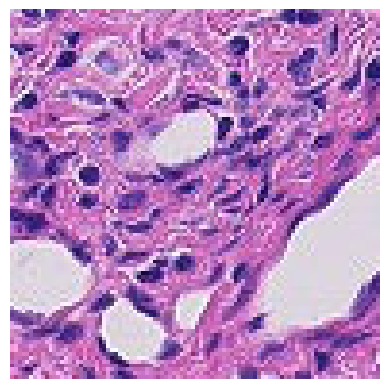

End Time:- 0:00:00.058351


In [4]:
import matplotlib.image as mpimg
import os
from skimage.color import rgb2gray


import time

import datetime

# start the time
start_time = datetime.datetime.now() 
print("Start Time:-", start_time) 

print('\n')


# Load the image
im = mpimg.imread('image2.tiff')

# Display the image
plt.imshow(im)
plt.axis('off')
plt.show()

print("End Time:-", (datetime.datetime.now() - start_time))

In [5]:
# Print the image dimensions
print('Original image shape: {}'.format(im.shape))

# Turning the image into grayscale format 
img_gray = rgb2gray(im)
print('New image shape: {}'.format(img_gray.shape))

Original image shape: (96, 96, 3)
New image shape: (96, 96)


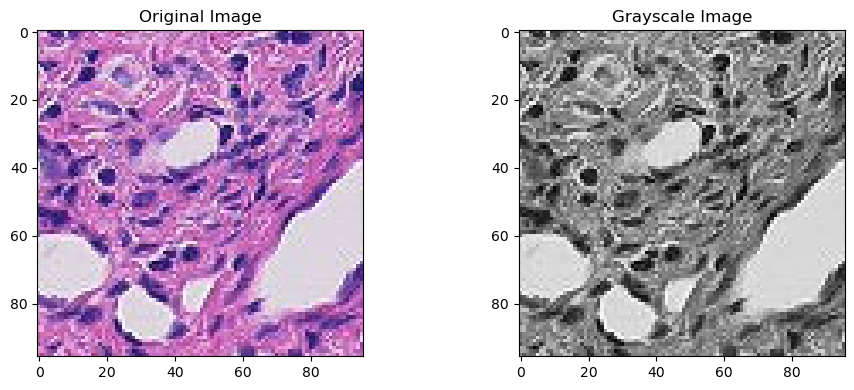

In [6]:
# Plot the data

plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.imshow(im)
plt.title('Original Image')

plt.subplot(1,2,2)
plt.imshow(img_gray, cmap='gray')
plt.title('Grayscale Image')

plt.tight_layout()
plt.show()

In [7]:
# Load the first image to get the image size
sample_img = load_img(os.path.join(img_dirs, os.listdir(img_dirs)[0]))
img_width, img_height = sample_img.size

In [8]:
maxC = 10000

In [9]:
from tqdm import tqdm

In [10]:
# Load the first 10000 RGB TIFF images and convert them to arrays

import time

import datetime

# start the time
start_time = datetime.datetime.now() 
print("Start Time:-", start_time) 

print('\n')

data=[]
i=0
path=r"C:\Users\mseme\OneDrive\Desktop\train"
for num in tqdm(id_df_news.index):
    if i >= maxC:
        break
    img = load_img(os.path.join(path, id_df_news['id'][num] + ".tif"), target_size=(img_width, img_height))
    img_array = img_to_array(img)
    data.append([img_array, id_df_news['label'][num]])
    i=i+1
    # plt.imshow(img)
print("End Time:-", (datetime.datetime.now() - start_time))

# end the time

Start Time:- 2023-04-07 13:52:03.253482




  5%|███▎                                                                     | 10000/220025 [00:03<01:21, 2591.14it/s]

End Time:- 0:00:03.862266


In [11]:
X=[]
y=[]

for images, labels in data:
    X.append(images)
    y.append(labels)

In [12]:
len(X)

10000

In [13]:
X=np.array(X)
y=np.array(y)

In [14]:
y[0]

0

In [15]:
y.shape

(10000,)

In [16]:
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.1, random_state=42)
 
#, stratify=y, random_state=10)

In [17]:

# from sklearn.decomposition import PCA

# import time

# import datetime

# # start the time
# start_time = datetime.datetime.now() 
# print("Start Time:-", start_time) 

# print('\n')

# pca = PCA()
 
# X_train2 = pca.fit_transform(X_train2)
# X_test2 = pca.transform(X_test2)

# print("End Time:-", (datetime.datetime.now() - start_time))

# # end the time

In [18]:

# X_train = X_train / 255.
# X_test = X_test / 255.

X_train = X_train.reshape(X_train.shape[0], 96, 96, 3)
X_test = X_test.reshape(X_test.shape[0], 96, 96, 3)

In [19]:
print(X_train.shape)
print(X_test.shape)

(9000, 96, 96, 3)
(1000, 96, 96, 3)


In [20]:
# simply normalize the features to the range of [0,1]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [21]:
# output label:
print (y_train.shape)
print (y_train[:10])

(9000,)
[1 0 1 0 0 0 0 1 1 1]


In [22]:
# OneHotEncoding for the output label:
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

In [23]:
# Label after OneHotEncoding:
print (y_train.shape)
print (y_train[:10])

(9000, 10)
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [24]:

# Declare Sequential model fro our network:
model = Sequential()

In [25]:
# CNN first layer (with 32 3x3 filter):
model.add(Convolution2D(32, (3, 3), activation='relu', input_shape=(96,96,3)))
print(model.output_shape) # -> (None, 26, 26, 32)

# If your image batch is of N images of HxW size with C channels: 
# theano uses the NCHW ordering while tensorflow uses the NHWC ordering.

(None, 94, 94, 32)


In [26]:
# more hidden layers:
model.add(Convolution2D(32, (3, 3), activation='relu'))
print(model.output_shape)

# Pooling Layer:
model.add(MaxPooling2D(pool_size=(2,2)))
print(model.output_shape)

# Dropout layer to avoid overfitting
model.add(Dropout(0.25)) 

(None, 92, 92, 32)
(None, 46, 46, 32)


In [27]:
# output Fully connected Dense layers:
model.add(Flatten())
print(model.output_shape)

model.add(Dense(128, activation='relu'))
print(model.output_shape)

model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
print(model.output_shape)

(None, 67712)
(None, 128)
(None, 10)


In [28]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],
              optimizer='adam')
# more info about loss functions: https://keras.io/losses
# more infor about Optimizers: https://keras.io/optimizers

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 94, 94, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 92, 92, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 46, 46, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 46, 46, 32)        0         
                                                                 
 flatten (Flatten)           (None, 67712)             0         
                                                                 
 dense (Dense)               (None, 128)               8667264   
                                                        

In [29]:
history = model.fit(X_train, y_train, batch_size=50, epochs=3, verbose=1)
# history = model.fit(X_train, y_train, validation_split=0.1, batch_size=50, epochs=3, verbose=1)
                    # validation_split=0.1, batch_size=50, epochs=15, verbose=1)

# batch_size: Integer or None. Number of samples per gradient update. 
# epochs: Number of iteration over the entire x and y data provided. 
# verbose: 0, 1, or 2. how want to see the training progress. 0 = silent, 1 = progress bar, 2 = one line per epoch.
# validation_split: Float between 0 and 1. Fraction of the training data to be used as validation data. 
# You can add some callbacks to get a view on internal states and statistics of the model during training:
# https://keras.io/callbacks/     

Epoch 1/3
180/180 [==============================] - 42s 228ms/step - loss: 0.6389 - accuracy: 0.7088
Epoch 2/3
180/180 [==============================] - 40s 220ms/step - loss: 0.5112 - accuracy: 0.7688
Epoch 3/3
180/180 [==============================] - 43s 241ms/step - loss: 0.4884 - accuracy: 0.7796


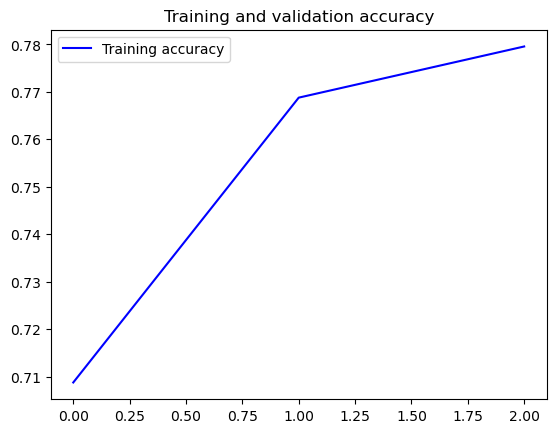

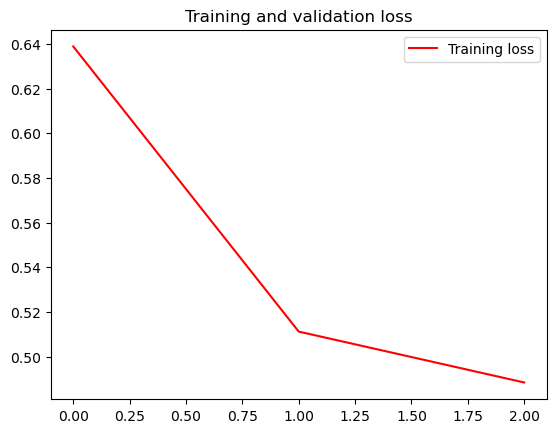

In [30]:
import matplotlib.pyplot as plt

%matplotlib inline

accuracy = history.history['accuracy']
#val_accuracy = history.history['val_acc']
loss = history.history['loss']
#val_loss = history.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'b-', label='Training accuracy')
#plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'r-', label='Training loss')
#plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
# plt.show()

In [31]:
# predicted_classes = model.predict_classes(X_test)

predictions = (model.predict(X_test) > 0.5).astype("int32")

32/32 [==============================] - 1s 27ms/step


In [32]:
# Testing:
score = model.evaluate(X_test, y_test, verbose=1)
print('The accuracy is: ', score[1])

32/32 [==============================] - 1s 29ms/step - loss: 0.4893 - accuracy: 0.7860
The accuracy is:  0.7860000133514404
